In [35]:
import sys
import tweepy
sys.path.insert(1, '../../')
import keys
from datetime import datetime
import nltk
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
#api conf
auth = tweepy.OAuthHandler(keys.cos_pub, keys.cos_sec)
auth.set_access_token(keys.as_pub, keys.as_sec)

api = tweepy.API(auth)


In [11]:
#getting data
search_terms = ["notebook", 'celular', 'câmera', 'iphone', 'câmera', 'smartwatsh', 'memória', 'ventilador', 'aplicativo']
def twitter_search(terms):
    tmp_search_result = []
 
    for e in search_terms:
        partial_result = [];
        api_result = api.search(q=e, tweet_mode='extended', count=100, lang='pt', retweeted=False, reply=False)

        for prop in api_result:
            partial_result.append(prop._json['full_text'])
        tmp_search_result.extend(partial_result)
        
    return tmp_search_result
search_result = twitter_search(search_terms)
search_result

['@lucasdebelmont @pharaujo85 @opropriolavo Além de ouvir a rádio citada, posso assistir pela smartv, pelo celular, tablet, notebook, computador...',
 'RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado é o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4',
 'Fiquei catando meus vídeos e fotos antigos do iCloud depois o sorriso pediu pra eu fazer um favor pra ele e eu mais de 5 horas com a cara no notebook era só o que eu precisava pra está louca de dor de cabeça agr 🤦🏾\u200d♀️',
 '@iuris_man Pede para alguém tirar o hd e testar em outro notebook ou pc.',
 'RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado é o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4',
 '@CarlosBolsonaro @augustosnunes Falou o cuzão que fica na Internet com uma arma ao lado do notebook....vai tomar Todynho e comer Ana Maria!!!!',
 'meu celular morreu tive que ir fazer orçamento do meu notebook que tb deu pipitchu n ta facil armygos',
 'Spotify no 

In [12]:
#saving data in a txt file
file_path = '../datasets/tweets/{0}.txt'.format(datetime.now())
with open(file_path, 'wb') as file:
    for e in search_result:
        #testar depois tirando \ns
        entry = '{0}\n || \n '.format(e.splitlines()) #tweet separator
        file.write(entry.encode())
    file.close()

In [23]:
# juntando todas as palavras e removendo \n
group_text = ''.join(''.join(search_result).splitlines())
group_text

'@lucasdebelmont @pharaujo85 @opropriolavo Além de ouvir a rádio citada, posso assistir pela smartv, pelo celular, tablet, notebook, computador...RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado é o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4Fiquei catando meus vídeos e fotos antigos do iCloud depois o sorriso pediu pra eu fazer um favor pra ele e eu mais de 5 horas com a cara no notebook era só o que eu precisava pra está louca de dor de cabeça agr 🤦🏾\u200d♀️@iuris_man Pede para alguém tirar o hd e testar em outro notebook ou pc.RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado é o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4@CarlosBolsonaro @augustosnunes Falou o cuzão que fica na Internet com uma arma ao lado do notebook....vai tomar Todynho e comer Ana Maria!!!!meu celular morreu tive que ir fazer orçamento do meu notebook que tb deu pipitchu n ta facil armygosSpotify no notebook é uma DISGRAÇAAAAEssa merda

In [33]:
#filtrando
stop_words = nltk.corpus.stopwords.words('portuguese')

words_list = group_text.split()
words_list = [e.strip().strip(string.punctuation).lower() for e in words_list]
words_list = [e for e in words_list if e not in stop_words and not '']

words_list

['lucasdebelmont',
 'pharaujo85',
 'opropriolavo',
 'além',
 'ouvir',
 'rádio',
 'citada',
 'posso',
 'assistir',
 'smartv',
 'celular',
 'tablet',
 'notebook',
 'computador...rt',
 'bullshhhit',
 'mexer',
 'notebook',
 'dentro',
 'casa',
 'arma',
 'lado',
 'maior',
 'conceito',
 'micropenis',
 'ja',
 'visto',
 'https://t.co/fphq0lvnv4fiquei',
 'catando',
 'vídeos',
 'fotos',
 'antigos',
 'icloud',
 'sorriso',
 'pediu',
 'pra',
 'fazer',
 'favor',
 'pra',
 '5',
 'horas',
 'cara',
 'notebook',
 'precisava',
 'pra',
 'louca',
 'dor',
 'cabeça',
 'agr',
 '🤦🏾\u200d♀️@iuris_man',
 'pede',
 'alguém',
 'tirar',
 'hd',
 'testar',
 'outro',
 'notebook',
 'pc.rt',
 'bullshhhit',
 'mexer',
 'notebook',
 'dentro',
 'casa',
 'arma',
 'lado',
 'maior',
 'conceito',
 'micropenis',
 'ja',
 'visto',
 'https://t.co/fphq0lvnv4@carlosbolsonaro',
 'augustosnunes',
 'falou',
 'cuzão',
 'fica',
 'internet',
 'arma',
 'lado',
 'notebook....vai',
 'tomar',
 'todynho',
 'comer',
 'ana',
 'maria!!!!meu',
 'celul

In [34]:
#termos mais frequentes
frequence_list = Counter(words_list)
frequence_list.most_common(20)

[('celular', 169),
 ('pra', 143),
 ('câmera', 139),
 ('iphone', 105),
 ('notebook', 99),
 ('tá', 87),
 ('taxi', 84),
 ('aplicativo', 78),
 ('ventilador', 76),
 ('memória', 72),
 ('tô', 65),
 ('', 62),
 ('disse', 56),
 ('q', 55),
 ('pai', 50),
 ('vc', 43),
 ('c', 43),
 ('provavelmente', 43),
 ('vitorj_086', 42),
 ('achou', 42)]

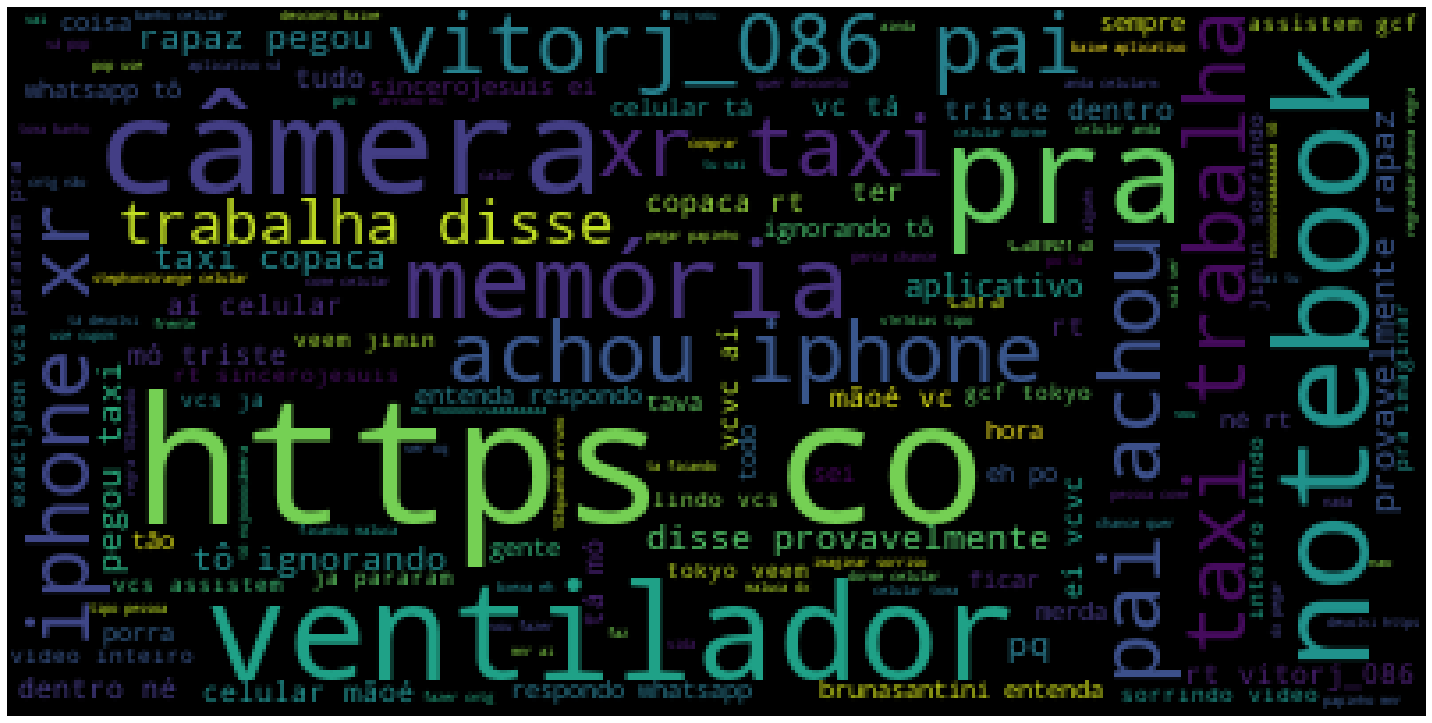

In [41]:
filtered_words = ' '.join(words_list)
word_cloud = WordCloud(max_font_size=50).generate(filtered_words)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(word_cloud, interpolation='nearest')
plt.axis("off")
plt.tight_layout()
plt.show()